<a href="https://colab.research.google.com/github/Brunolts01/analise-brasileirao/blob/main/analise_dados_brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisando dados do brasileirão Série A

Nesse projeto iremos analisar os dados da série A do brasileirão. A intenção é
entender os principais indicadores como: time que mais fez gols, mais levou cartões vermelhos entre outros. Ao final iremos criar uma pontuação final para classificar os melhores times nos últimos anos.

Os dados em questão foram retirados do site da CBF: https://www.cbf.com.br/futebol-brasileiro/competicoes/campeonato-brasileiro-serie-a

### 1.0 Importando dados e visualizando dataframe

Nessa primeira parte iremos import nosso arquivo conectando ao Drive. Logo depois iremos fazer uma visualização rápida na nossa base para entender as caraterísticas na mesma.

In [131]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Conectando ao Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [133]:
# Critando dataframe
df = pd.read_csv('/content/drive/MyDrive/PROJETOS_DS/regressao-linear-brasileirao_serie-a/arquivos/dataset_brasileirao_serie_a_hist.csv', encoding='1252', sep=';')

In [134]:
# Shape do arquivo e primeiras linas
print(f"Total de colunas {df.shape[1]} \nTotal de linhas {df.shape[0]}")
print('\n')
df.head(10)

Total de colunas 14 
Total de linhas 220




,POSIÇÃO,TIME,PTS,J,V,E,D,GP,GC,SG,CA,CV,%,ANO
0,1,Cruzeiro,80,38,24,8,6,67,38,29,70,2,70,2014
1,2,São Paulo,70,38,20,10,8,59,40,19,92,4,61,2014
2,3,Internacional,69,38,21,6,11,53,41,12,92,6,60,2014
3,4,Corinthians,69,38,19,12,7,49,31,18,70,3,60,2014
4,5,Atlético Mineiro,62,38,17,11,10,51,38,13,83,2,54,2014
5,6,Fluminense,61,38,17,10,11,61,42,19,75,5,53,2014
6,7,Grêmio,61,38,17,10,11,36,24,12,95,3,53,2014
7,8,Atletico Paranaense,54,38,15,9,14,43,42,1,72,1,47,2014
8,9,Santos,53,38,15,8,15,42,35,7,71,4,46,2014
9,10,Flamengo,52,38,14,10,14,46,47,-1,67,4,45,2014


Temos algumas colunas com nomes abreviados, aqui está o que cada uma quer dizer:

* Posição: Classificação final do time naquela temporada
* PTS = Pontos
* J = Jogos
* V = Vitórias
* E = Empates
* D = Derrotas
* GP = Gols Pró
* GC = Gols Contra
* SG = Saldo Gols
* CA = Cartão Amarelo
* CV = Cartão Vermelho
* % = Aproveitamento
* Ano = Ano da competição.

Vamos analisar os atributos da nossa base e ver se está tudo certo para começarmos a analisar a mesma. Antes disso, só vamos renomear a coluna de aproveitamento para termos uma visão melhor e evitar possíveis erros.

In [135]:
# Rename de colunas
df.rename(columns = {'%': 'APROVEITAMENTO'}, inplace=True)
df.columns

Index(['POSIÇÃO', 'TIME', 'PTS', 'J', 'V', 'E', 'D', 'GP', 'GC', 'SG', 'CA',
       'CV', 'APROVEITAMENTO', 'ANO'],
      dtype='object')

In [136]:
# Vendo tipos de dados
df.dtypes

POSIÇÃO            int64
TIME              object
PTS                int64
J                  int64
V                  int64
E                  int64
D                  int64
GP                 int64
GC                 int64
SG                 int64
CA                 int64
CV                 int64
APROVEITAMENTO     int64
ANO                int64
dtype: object

In [137]:
# Verificando valores nulos
df.isnull().sum()

POSIÇÃO           0
TIME              0
PTS               0
J                 0
V                 0
E                 0
D                 0
GP                0
GC                0
SG                0
CA                0
CV                0
APROVEITAMENTO    0
ANO               0
dtype: int64

In [138]:
# Valores duplicados
df.duplicated().sum()

0

Num primeiro momento não temos erros na base. Por uma questão de conveniência iremos apenas converter o valor da coluna **TIME** para string, sabemos que o mesmo se trata de um valor de texto então não é necessário que fique como object.

In [139]:
# Convertendo coluna para string e verificando dtypes novamente
df['TIME'] = df['TIME'].astype('string')
df.dtypes

POSIÇÃO                    int64
TIME              string[python]
PTS                        int64
J                          int64
V                          int64
E                          int64
D                          int64
GP                         int64
GC                         int64
SG                         int64
CA                         int64
CV                         int64
APROVEITAMENTO             int64
ANO                        int64
dtype: object

In [140]:
# Times únicos

df['TIME'].unique()

<StringArray>
[               'Cruzeiro',               'São Paulo',
           'Internacional',             'Corinthians',
        'Atlético Mineiro',              'Fluminense',
                  'Grêmio',     'Atletico Paranaense',
                  'Santos',                'Flamengo',
                   'Sport',                   'Goiás',
             'Figueirense',                'Coritiba',
             'Chapecoense',               'Palmeiras',
                 'Vitória',                   'Bahia',
                'Botafogo',                'Criciuma',
             'Ponte Preta',                    'Avaí',
           'Vasco da Gama',               'Joinville',
              'Santa Cruz',                 'América',
     'Atlético Goianiense',    'Athletico Paranaense',
                   'Ceará',              'America Fc',
                  'Paraná',               'Fortaleza',
                     'Csa',     'Red Bull Bragantino',
                 'America',                  'Cuiab

Temos alguns casos marcados como "saf", isso acontece porque alguns clubes adereriam a um novo formato possibilitando que eles virassem empresas a partir de 2021, o que acabou alterando o nome.

Iremos tratar esses valores.

In [141]:
# Removendo SAF dos nomes dos clubes

df['TIME'] = df['TIME'].str.replace(' Saf', '')
df['TIME'] = df['TIME'].str.replace(' S.a.f.', '')

In [142]:
# Verificando valores novamente
lista_times = df['TIME'].unique().tolist()

lista_times.sort()
lista_times

['America',
 'America Fc',
 'América',
 'América Fc',
 'Athletico Paranaense',
 'Atletico Paranaense',
 'Atlético Goianiense',
 'Atlético Mineiro',
 'Avaí',
 'Bahia',
 'Botafogo',
 'Ceará',
 'Chapecoense',
 'Corinthians',
 'Coritiba',
 'Criciuma',
 'Criciúma',
 'Cruzeiro',
 'Csa',
 'Cuiabá',
 'Figueirense',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goiás',
 'Grêmio',
 'Internacional',
 'Joinville',
 'Juventude',
 'Palmeiras',
 'Paraná',
 'Ponte Preta',
 'Red Bull Bragantino',
 'Santa Cruz',
 'Santos',
 'Sport',
 'São Paulo',
 'Vasco da Gama',
 'Vitória']

Ainda temos um erro na base como o América aparecendo duas vezes: '**America**' e
'**America FC**', Athletico Paranaense com e sem H e outros tipos de duplicidades devido à acentuação.

 Vamos tratar esses dados.

In [143]:
## Tratando valores

# Substituindo valores do America

df['TIME'] = df['TIME'].str.replace('América Fc', 'América')
df['TIME'] = df['TIME'].str.replace('America Fc', 'América')
df['TIME'] = df['TIME'].str.replace('America', 'América')

# Substituindo valores do Athletico Paranaense
df['TIME'] = df['TIME'].str.replace('Atletico Paranaense', 'Athletico Paranaense')

# Substituindo valores do Criciúma
df['TIME'] = df['TIME'].str.replace('Criciuma', 'Criciúma')

In [144]:
# Verificando novamente
lista_times = df['TIME'].unique().tolist()

lista_times.sort()
lista_times

['América',
 'Athletico Paranaense',
 'Atlético Goianiense',
 'Atlético Mineiro',
 'Avaí',
 'Bahia',
 'Botafogo',
 'Ceará',
 'Chapecoense',
 'Corinthians',
 'Coritiba',
 'Criciúma',
 'Cruzeiro',
 'Csa',
 'Cuiabá',
 'Figueirense',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goiás',
 'Grêmio',
 'Internacional',
 'Joinville',
 'Juventude',
 'Palmeiras',
 'Paraná',
 'Ponte Preta',
 'Red Bull Bragantino',
 'Santa Cruz',
 'Santos',
 'Sport',
 'São Paulo',
 'Vasco da Gama',
 'Vitória']

Agora está tudo ok e podemos seguir!

## 2.0 Análise de dados

Vamos começar a analisar nossos dados entender as características de cada variável bem como suas distribuiçoes no dataframe.

In [145]:
# Descricao das variáreis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
POSIÇÃO,220.0,10.500000,5.779431,1.0,5.75,10.5,15.25,20.0
PTS,220.0,49.022727,15.461971,7.0,41.00,50.0,58.00,90.0
J,220.0,35.890909,6.689930,13.0,38.00,38.0,38.00,38.0
V,220.0,13.154545,4.973329,1.0,10.00,13.0,16.00,28.0
E,220.0,9.572727,3.024886,2.0,8.00,10.0,11.00,17.0
D,220.0,13.163636,4.902757,2.0,10.00,13.0,17.00,25.0
GP,220.0,42.272727,13.046394,10.0,34.00,42.0,50.25,86.0
GC,220.0,42.300000,11.921394,11.0,36.00,42.0,49.00,81.0
SG,220.0,-0.027273,16.303603,-44.0,-10.00,0.0,10.00,49.0
CA,220.0,85.527273,18.801637,15.0,77.75,88.0,96.00,130.0


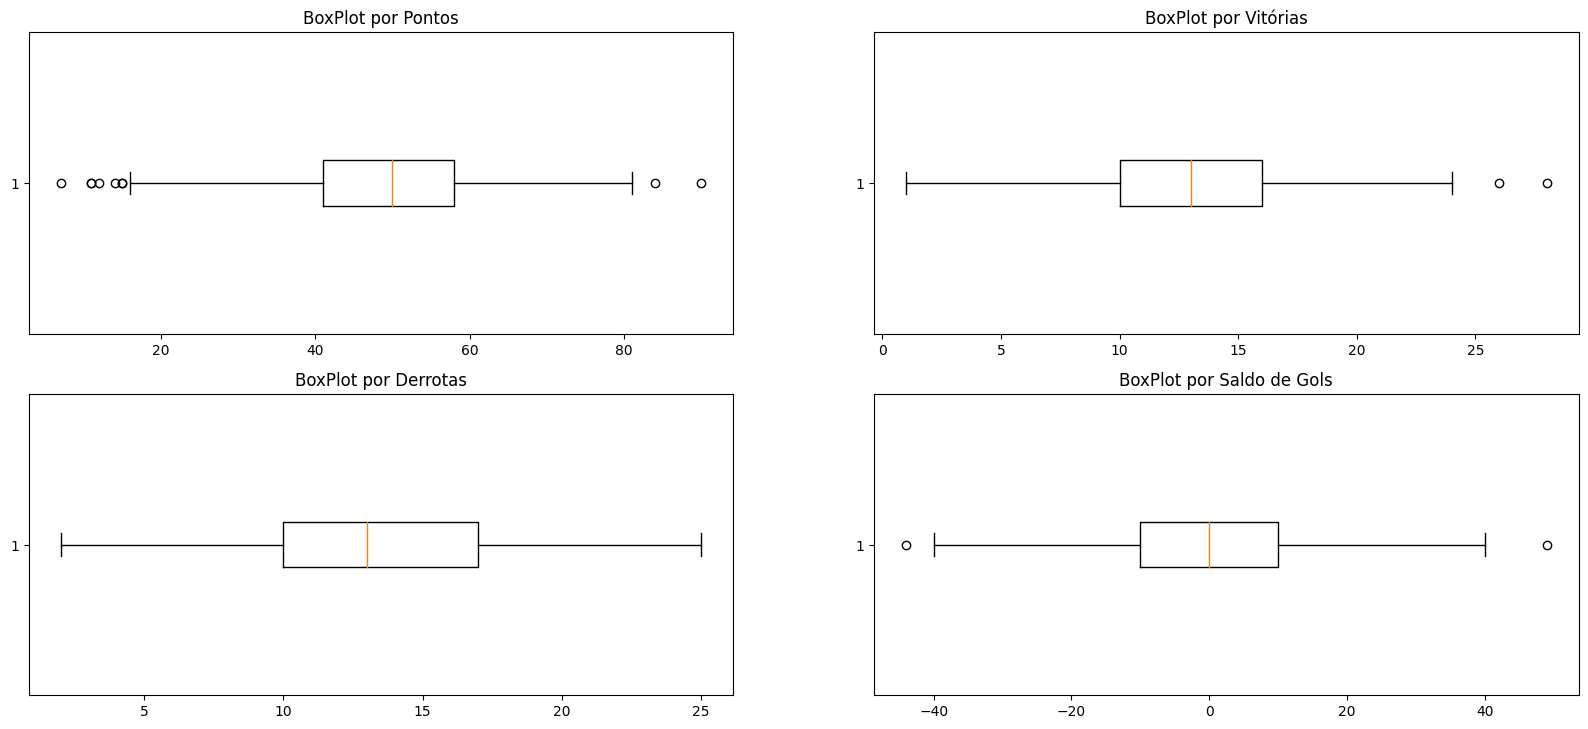

In [146]:
# Plotando gráficos para análise visual das colunas

plt.figure(figsize=(20, 18))
plt.subplot(4, 2, 1)
plt.boxplot(df['PTS'], vert=False)
plt.title('BoxPlot por Pontos')

plt.subplot(4, 2, 2)
plt.boxplot(df['V'], vert=False)
plt.title('BoxPlot por Vitórias')

plt.subplot(4, 2, 3)
plt.boxplot(df['D'], vert=False)
plt.title('BoxPlot por Derrotas')

plt.subplot(4, 2, 4)
plt.boxplot(df['SG'], vert=False)
plt.title('BoxPlot por Saldo de Gols');

Temos alguns comportamentos que podem parecer entranhos à primeira vista, como por exemplo, existem times com só **uma vitória** e outras com só **duas derrotas**. Vamos validar esses dados na base.

In [147]:
# Times com apenas uma vitória
df[df['V'] == 1]

,POSIÇÃO,TIME,PTS,J,V,E,D,GP,GC,SG,CA,CV,APROVEITAMENTO,ANO
159,20,Chapecoense,15,38,1,12,25,27,67,-40,82,10,13,2021
219,20,Fluminense,7,15,1,4,10,11,23,-12,50,7,15,2024


In [148]:
# Times com apenas duas derrotas
df[df['D'] == 2]

,POSIÇÃO,TIME,PTS,J,V,E,D,GP,GC,SG,CA,CV,APROVEITAMENTO,ANO
200,1,Flamengo,31,15,9,4,2,27,15,12,30,0,68,2024


Um dos times com apenas 1 vitória foi a chapecoence em 2021 e o dado está correto. No ano de 2021 a Chapecoense foi rebaixada com 15 pontos na última posição da tabela, firmando a pior campanha das história dos pontos corridos até então. O outro time foi o Fluminense no ano de 2024, o que bate também com o site da CBF.

E referente ao Flamengo com apenas duas derrotas em 2024 também está correto de acordo com o site da CBF.

## 2.1 Análise de por clubes

Iremos analisar as estatísticas dos clubes, entendendo qual time teve mais gols nos, qual levou mais cartões amarelos, quem teve o melhor aproveitamento nos últimos anos e entre outros..

Como vimos acima, temos o ano de 2024 na nossa base, esse campeonato ainda não acabou, por esse motivo iremos excluir o mesmo para que ele não impacte nossa análise.

### Classificação de acordo com a média de pontos


In [149]:
# Criando novo dataframe para análise

df_filtrado = df[df['ANO'] < 2024]

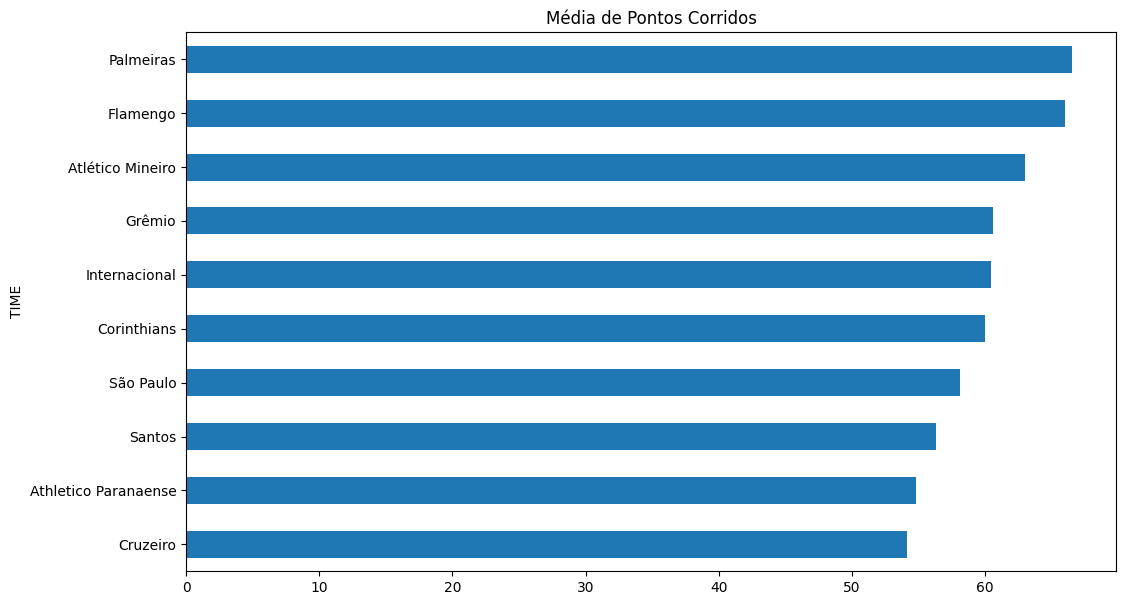

In [150]:
df_filtrado.groupby("TIME").PTS.mean().sort_values(ascending=True).tail(10).plot(kind='barh',
                                                               figsize=(12, 7),
                                                               title='Média de Pontos Corridos'
                                                               );

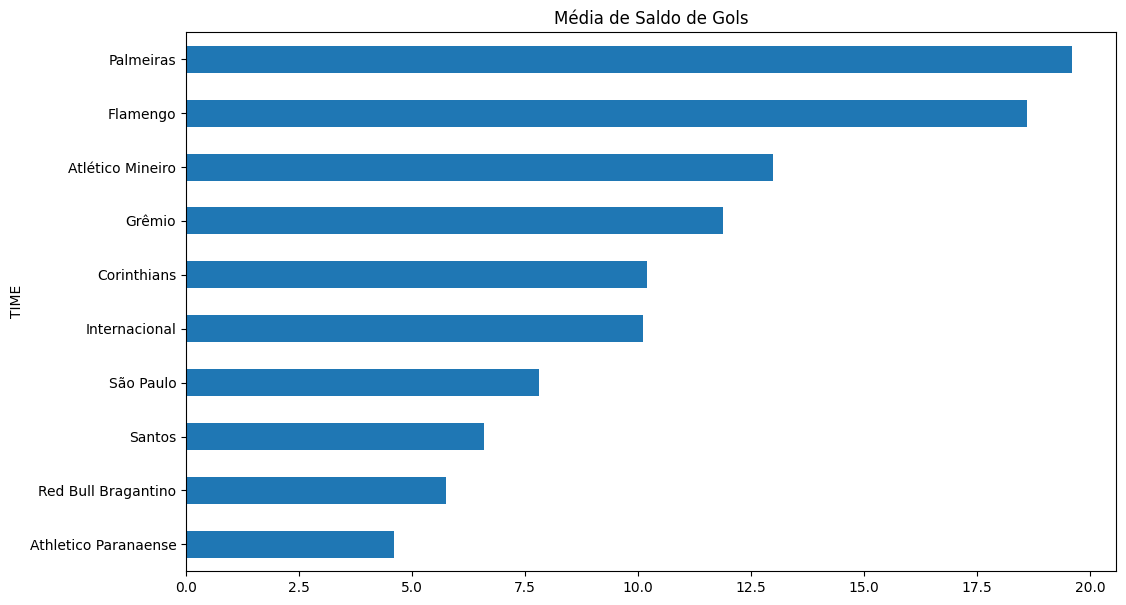

In [151]:
### Classificação de acordo com média de saldo de gols

df_filtrado.groupby("TIME").SG.mean().sort_values(ascending=True).tail(10).plot(kind='barh',
                                                                                 figsize=(12, 7),
                                                                                 title="Média de Saldo de Gols");

### Média de Cartões Vermelhos e Amarelos

5 Times com mais cartões Amarelos

In [152]:
# Busca times com mais cartões amarelos
df_filtrado.groupby("TIME").CA.mean().sort_values(ascending=False).head(5)

TIME
Criciúma         114.000000
Juventude        102.500000
Vasco da Gama    101.500000
Goiás             99.000000
Internacional     98.888889
Name: CA, dtype: float64

5 times com menos cartões Amarelos

In [153]:
# Busca times com menos cartões amarelos
df_filtrado.groupby("TIME").CA.mean().sort_values(ascending=False).tail(5)

TIME
Sport          83.857143
Chapecoense    80.857143
Flamengo       80.300000
América        78.000000
Corinthians    76.300000
Name: CA, dtype: float64

5 Times com mais cartões Vermelhos

In [154]:
df_filtrado.groupby("TIME").CV.mean().sort_values(ascending=False).head(5)

TIME
Paraná           9.000000
Fortaleza        8.200000
Joinville        8.000000
Figueirense      7.666667
Vasco da Gama    7.500000
Name: CV, dtype: float64

5 Times com menos cartões Vermelhos

In [155]:
df_filtrado.groupby("TIME").CV.mean().sort_values(ascending=False).tail(5)

TIME
Atlético Mineiro        4.1
Csa                     4.0
Chapecoense             4.0
Athletico Paranaense    3.8
Corinthians             3.8
Name: CV, dtype: float64

### Média de aproveitamento

Times com maior aproveitamento

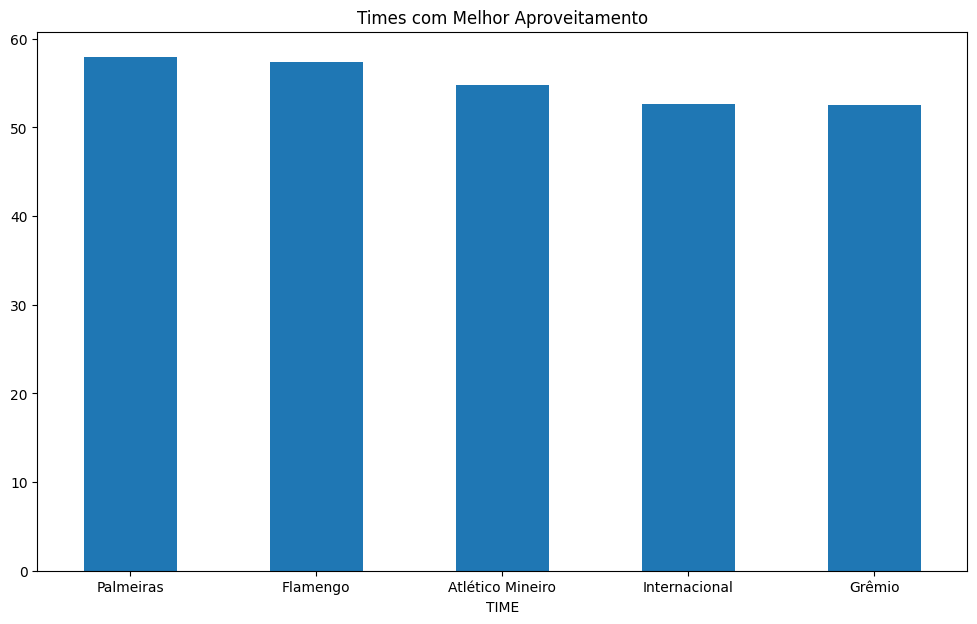

In [156]:
# Plot de times com melhor aproveitamento
df_filtrado.groupby("TIME").APROVEITAMENTO.mean().sort_values(ascending=False).head(5).plot(kind = 'bar',
                                                                                            rot=0,
                                                                                            figsize=(12, 7),
                                                                                            title = "Times com Melhor Aproveitamento"
                                                                                          );

Times com menor aproveitamento

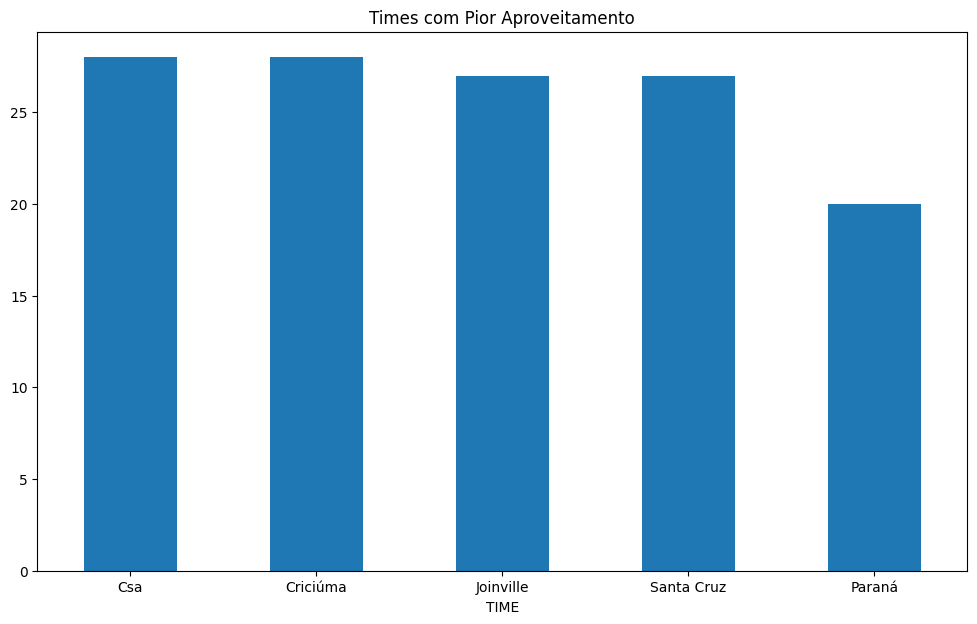

In [157]:
# Plot de times com pior aproveitamento
df_filtrado.groupby("TIME").APROVEITAMENTO.mean().sort_values(ascending=False).tail(5).plot(kind='bar',
                                                                                            rot=0,
                                                                                            figsize=(12, 7),
                                                                                            title = "Times com Pior Aproveitamento"
                                                                                            );

### Conclusões da análise



*   O time com a maior média de pontos e melhor saldo de gols é o Palmeiras.
*   O time que mais levou cartões amarelos foi o Criciúma e o que menos levou foi o Corinthians.
*   O time que mais levou cartões vermelhos foi o Paraná e o que menos levou foi o Corinthians.
*   O time com melhor aproveitamento nos últimos 9 anos é o Palmeiras e os piores são Csa, Criciúma Joinville e Santa Cruz.



## 3.0 Criando Super Tabela de Pontuação

Iremos entender agora quais foram os melhores times nos últimos 9 anos, de 2014 a 2023.
Para isso, iremos analisar as colunas de pontos, vitórias, saldo de gols e aproveitamento. Iremos fazer a média dos últimos anos, criar uma nova colunas de pontuação e por fim achar os quartis desses dados.

In [160]:
## Criando nova tabela com média geral de pontos, vitórias, salgo de gols e aproveitamento e por fim criando uma coluna com a soma de todos esses itens.

# Nova tabela
df_super_tabela = df.groupby(['TIME'], as_index=False).agg({'PTS': 'mean', 'V': 'mean', 'SG':'mean', 'APROVEITAMENTO':'mean'}).rename(columns={'PTS': 'MEDIA_PONTOS',
                                                                                                                                               'V':'MEDIA_VITORIAS',
                                                                                                                                               'SG': 'MEDIA_SG',
                                                                                                                                               'APROVEITAMENTO':'MEDIA_APROVEITAMENTO'})
# Nova Coluna
df_super_tabela['PONTUACAO_FINAL'] = df_super_tabela['MEDIA_PONTOS'] + df_super_tabela['MEDIA_VITORIAS'] + df_super_tabela['MEDIA_SG'] + df_super_tabela['MEDIA_APROVEITAMENTO']

Tabela pronta iremos ordenar a mesma para ver os melhores times.

In [161]:
# Ordenando tabela para ver os melhores times

df_super_tabela.sort_values(['PONTUACAO_FINAL'], ascending=False)

,TIME,MEDIA_PONTOS,MEDIA_VITORIAS,MEDIA_SG,MEDIA_APROVEITAMENTO,PONTUACAO_FINAL
24,Palmeiras,63.181818,18.181818,18.818182,58.636364,158.818182
16,Flamengo,62.818182,18.272727,18.000000,58.363636,157.454545
3,Atlético Mineiro,58.909091,16.636364,11.545455,53.636364,140.727273
21,Internacional,56.300000,15.600000,9.200000,52.200000,133.300000
20,Grêmio,55.600000,15.600000,9.800000,49.900000,130.900000
31,São Paulo,55.272727,14.727273,7.818182,51.363636,129.181818
9,Corinthians,55.636364,14.909091,8.363636,49.818182,128.727273
29,Santos,56.300000,15.400000,6.600000,48.800000,127.100000
1,Athletico Paranaense,52.090909,14.454545,4.545455,48.090909,119.181818
12,Cruzeiro,50.625000,13.500000,4.125000,48.375000,116.625000


Agora iremos achar os quartis da nossa base. Assim poderemos ter uma visão melhor além da pontuação para entender como os times se dividem.

In [162]:
# Achando quartis
quartis = df_super_tabela['PONTUACAO_FINAL'].quantile([0.25, 0.50, 0.75, 1.0])
q1, q2, q3, q4 = quartis.values

In [163]:
# Calculando bins e criando labels para coluna
bins = [df_super_tabela['PONTUACAO_FINAL'].min()-1, q1, q2, q3, q4]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

In [164]:
# Criando coluna de quartial
df_super_tabela['QUARTIL'] = pd.cut(df_super_tabela['PONTUACAO_FINAL'], bins=bins, labels=labels)

In [166]:
# Tabela final com quartis aplicados
df_super_tabela.sort_values('PONTUACAO_FINAL', ascending=False)

,TIME,MEDIA_PONTOS,MEDIA_VITORIAS,MEDIA_SG,MEDIA_APROVEITAMENTO,PONTUACAO_FINAL,QUARTIL
24,Palmeiras,63.181818,18.181818,18.818182,58.636364,158.818182,Q4
16,Flamengo,62.818182,18.272727,18.000000,58.363636,157.454545,Q4
3,Atlético Mineiro,58.909091,16.636364,11.545455,53.636364,140.727273,Q4
21,Internacional,56.300000,15.600000,9.200000,52.200000,133.300000,Q4
20,Grêmio,55.600000,15.600000,9.800000,49.900000,130.900000,Q4
31,São Paulo,55.272727,14.727273,7.818182,51.363636,129.181818,Q4
9,Corinthians,55.636364,14.909091,8.363636,49.818182,128.727273,Q4
29,Santos,56.300000,15.400000,6.600000,48.800000,127.100000,Q4
1,Athletico Paranaense,52.090909,14.454545,4.545455,48.090909,119.181818,Q4
12,Cruzeiro,50.625000,13.500000,4.125000,48.375000,116.625000,Q3


In [168]:
# Agrupamento por quartil
df_super_tabela.groupby("QUARTIL").TIME.count()

QUARTIL
Q1    9
Q2    8
Q3    8
Q4    9
Name: TIME, dtype: int64

Finalizamos nosso projeto aqui. Enxergamos diversas perspectivas da base, entendemos indicadores importantes e criamos uma classificação final dos times com base nos últimos anos.

Até uma próxima.